In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd 
import math
import random as rnd

def GenerateColor():
    def getRndInteger(min, max): 
        return math.floor(rnd.random() * (max - min + 1) ) + min;
    lastOne = 0;
    for i in range(getRndInteger(1, 5)):
        #Try to get bright colors by keeping one component in zero and other in one
        toOne = getRndInteger(0, 2);       
        lastOne = toOne = (toOne + 1) % 3 if toOne == lastOne else toOne        
        toZero  = getRndInteger(0, 2)
        toZero = (toZero + 1) % 3 if toZero == toOne else toZero
        toRand = getRndInteger(0, 4) / 4.0
        r = int((1.0 if toOne == 0 else ( 0 if toZero == 0 else toRand)) * 255)
        g = int(1.0 if toOne == 1 else ( 0 if toZero == 1 else toRand)  * 255)
        b = int(1.0 if toOne == 2 else ( 0 if toZero == 2 else toRand) * 255)
    return (r, g, b)



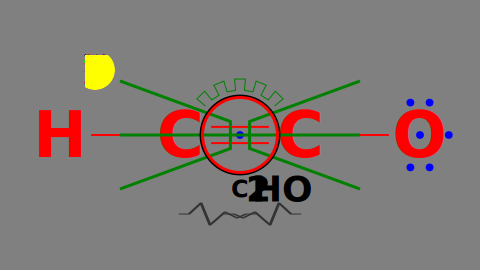

In [137]:
width = 480
height = 270

#SVG starting construction

SVG = '<?xml version="1.0" encoding="utf-8"?>\n'
SVG += '<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n'
SVG += f'<svg id="image" width="{width}px" height="{height}px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">'

SVG += '<rect x="0" y="0" width="100%" height="100%" style="fill:gray" /> \n'

#center circle
SVG += '<circle cx="50%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" />'

#************C2HO text 

textOffset_x = 12.5
textStep_x = 100*0.25
text = ['H', 'C', 'C', 'O']
for i in range(4):
    SVG += '<text x="'+ str(textOffset_x + i * textStep_x) +'%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-weight="bold">'+text[i]+'</text>'
    #SVG += '  <rect id="BG" width="100%" height="100%" fill="url(#BG-grad2)" style="mix-blend-mode: screen;" opacity="1" />\n\n'

#Lines
lineOffset = 19
lineLenght = 12
lineHeight = 3
SVG += '<line x1="'+ str(lineOffset + 0 * textStep_x) +'%" y1="50%" x2="'+ str(lineOffset + 0 * textStep_x + lineLenght) +'%" y2="50%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 1 * textStep_x) +'%" y1="50%" x2="'+ str(lineOffset + 1 * textStep_x + lineLenght) +'%" y2="50%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 1 * textStep_x) +'%" y1="' + str(50 - lineHeight) + '%" x2="'+ str(lineOffset + 1 * textStep_x + lineLenght) +'%" y2="' + str(50 - lineHeight) + '%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 1 * textStep_x) +'%" y1="' + str(50 + lineHeight) + '%" x2="'+ str(lineOffset + 1 * textStep_x + lineLenght) +'%" y2="' + str(50 + lineHeight) + '%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 2 * textStep_x) +'%" y1="50%" x2="'+ str(lineOffset + 2 * textStep_x + lineLenght) +'%" y2="50%" style="stroke:rgb(255,0,0);stroke-width:2" />'

#Circles in O
#--Center in O for guidance
centerRef_circles = textOffset_x + 3 * textStep_x
SVG += '<circle cx="'+ str(centerRef_circles) +'%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" />'

sep_x_circles = 2
offset_y_circles = 12
dirs_circles = [[-1, -1], [1, -1], [-1, 1], [1, 1]]
for i in range(4):
    SVG += '<circle cx="'+ str(centerRef_circles + dirs_circles[i][0] * sep_x_circles) +'%" cy="' + str(50 + dirs_circles[i][1] * offset_y_circles) + '%" r="1%" stroke="black" stroke-width="0" fill="blue" />'
SVG += '<circle cx="'+ str(centerRef_circles + sep_x_circles * 3) +'%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" />'


#************ C2HO Logo *************
def perc2pixels_x(perc):
    return str(width *perc /100);

def perc2pixels_y(perc):
    return str(height *perc /100);

def avg_perc(perc):
    return (float(perc2pixels_x(perc)) + float(perc2pixels_y(perc))) * 0.5
    
#************paths
side_x = 25
side_y = 30
middle_x = 48
middle_y = 45
#path left
SVG += ('<path d="M'+perc2pixels_x(side_x)+' '+perc2pixels_y(side_y)+' L'+perc2pixels_x(middle_x)+' '+perc2pixels_y(middle_y) +
        ' L' + perc2pixels_x(middle_x) + ' '+perc2pixels_y( 100 - middle_y) + ' L' + perc2pixels_x(side_x) + ' '+perc2pixels_y(100 -side_y) +
        '" stroke="green" stroke-width="3" fill="none"/>')
#path right
SVG += ('<path d="M'+perc2pixels_x(100 - side_x)+' '+perc2pixels_y(side_y)+' L'+perc2pixels_x(100 - middle_x)+' '+perc2pixels_y(middle_y) +
        ' L' + perc2pixels_x(100 - middle_x) + ' '+perc2pixels_y( 100 - middle_y) + ' L' + perc2pixels_x(100 - side_x) + ' '+perc2pixels_y(100 -side_y) +
        '" stroke="green" stroke-width="3" fill="none"/>')

#path middle
SVG += ('<path d="M'+perc2pixels_x(side_x)+' '+perc2pixels_y(50)+' L'+perc2pixels_x(100 - side_x)+' '+perc2pixels_y(50) +
        '" stroke="green" stroke-width="3" fill="none"/>')

#Circle tower
SVG += '<circle cx="50%" cy="50%" r="10%" stroke="black" stroke-width="3" fill="none" />'

SVG += '<circle cx="50%" cy="50%" r="'+str(avg_perc(10))+'" stroke="red" stroke-width="3" fill="none" />'

#OSLO logo
#SVG +=  '<path class="SamplePath" d="M100,200 C100,100 250,100 250,200" stroke="black" stroke-width="3" fill="none" />'
n_points = 10
ra = avg_perc(12)
arc_degree = 100
step = math.radians(arc_degree) / (n_points - 1)
start_degree = -arc_degree * 0.5 - 90
def angled_point(radius):
    cx = float(perc2pixels_x(50)) + radius * math.cos(math.radians(start_degree) + i * step)
    cy = float(perc2pixels_y(50)) + radius * math.sin(math.radians(start_degree) + i * step)
    return cx, cy
path_tower = ""
for i in range(n_points):
    cx_l, cy_l = angled_point(ra)
    cx_h, cy_h = angled_point(ra + avg_perc(3))
    #SVG += '<circle cx="'+str(cx_l)+'" cy="'+str(cy_l)+'" r="0.1%" stroke="black" stroke-width="3" fill="none" />'
    #SVG += '<circle cx="'+str(cx_h)+'" cy="'+str(cy_h)+'" r="0.1%" stroke="black" stroke-width="3" fill="none" />'
    if (i == 0):
        path_tower += '<path d="M'+str(cx_l)+' '+str(cy_l)
    if (i % 2 == 0):
        path_tower +=' L'+str(cx_l)+' '+str(cy_l)
        path_tower +=' L'+str(cx_h)+' '+str(cy_h)
    else:
        path_tower +=' L'+str(cx_h)+' '+str(cy_h)
        path_tower +=' L'+str(cx_l)+' '+str(cy_l)

path_tower += '" stroke="green" stroke-width="1" fill="none"/>' 

SVG += path_tower

# Text logo
SVG += ('<text x="50%" y="70%" text-anchor="middle" alignment-baseline="central" font-size="1.5em" font-family="cursive" font-weight="bold">' +
        'C<tspan baseline-shift="sub">2</tspan>HO</text>')

#Sound wave
#https://fontawesomeicons.com/svg/icons/electric-wave
SVG += ('<path d="M12 25H15L19 14L22 36L27 23L31 29L34 25H37" stroke="#333"' +
        ' transform="translate('+perc2pixels_x(30)+' '+perc2pixels_y(70)+') scale(3 1)"'+
        ' stroke-width="1" stroke-linecap="round" stroke-linejoin="round" fill="none"/>')

#SVG += '<line x1="47%" y1="79.25%" x2="53%" y2="79.25%" stroke="#333" stroke-width="1" />'

SVG += ('<path d="M12 25H15L19 14L22 36L27 23L31 29L34 25H37" stroke="#333"' +
        ' transform="translate('+perc2pixels_x(70)+' '+perc2pixels_y(70)+') scale(-3 1)"'+
        ' stroke-width="1" stroke-linecap="round" stroke-linejoin="round" fill="none"/>')

####### Six points ###########

#*****************Visual 

SVG += '<g id="visual" transform="translate(85 55) scale(0.5 0.5)">'
SVG += '<mask id="artmask">'
SVG += '<circle cx="20" cy="30" r="40" fill="white" />'
SVG += '<path d="M 10 10 C 20 0, 30 0, 40 10 S 30 20, 30 30 S 50 40, 40 50 S 20 60, 10 50 S 0 40, 0 30 S 0 20, 10 10 Z" stroke="black" stroke-width="1" fill="black" />'
SVG += '</mask>'
# random color cirles
for i in range(300):
    SVG += '<circle cx="'+str(rnd.random() * 40)+'" cy="'+str(rnd.random() * 60)+'" r="'+str(rnd.random() * 3)+'" fill="rgb'+str(GenerateColor())+'" />'

#put mask
SVG += '<circle cx="20" cy="30" r="40" mask="url(#artmask)" fill="yellow" />'
SVG += '</g>'



SVG += '</svg>\n'
#print(SVG)
ipd.display(ipd.SVG(SVG))

In [3]:
print(SVG)

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg id="image" width="480px" height="270px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><rect x="0" y="0" width="100%" height="100%" style="fill:gray" /> 
<circle cx="50%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" /><text x="12.5%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-weight="bold">H</text><text x="37.5%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-weight="bold">C</text><text x="62.5%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-weight="bold">C</text><text x="87.5%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-wei

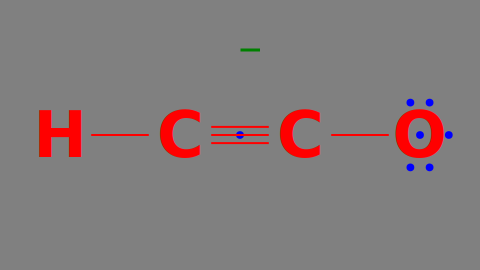

In [4]:
ipd.display(ipd.SVG(SVG))